<a href="https://colab.research.google.com/github/ernesc/masters_thesis_2022/blob/main/MLP_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MLP code

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#imports
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Activation
import tensorflow as tf
plt.style.use("ggplot")
from ipywidgets.widgets import interact, Layout

In [ ]:
def extract_data(filename, dataframe):
    
    import pandas as pd
    
    df_filename = pd.read_csv(filename,";")

    df_filename_lukket2 = pd.DataFrame()
    df_filename_lukket2 = df_filename_lukket2.append(df_filename[df_filename["Data Source"].str.contains("LUKKET")])
    df_filename_lukket = pd.DataFrame()
    df_filename_lukket = df_filename_lukket.append(df_filename_lukket2[df_filename_lukket2["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_lukket = df_filename_lukket.rename(columns={"Data Source": "data_source_lukket", 
                                          "Time": "time_lukket", 
                                          "Value": "value_lukket"})
    df_filename_lukket["time_lukket"] = pd.to_datetime(df_filename_lukket["time_lukket"])
    
    
    df_filename_apen1 = pd.DataFrame()
    df_filename_apen1 = df_filename_apen1.append(df_filename[df_filename["Data Source"].str.contains("APEN")])
    df_filename_apen = pd.DataFrame()
    df_filename_apen = df_filename_apen.append(df_filename_apen1[df_filename_apen1["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_apen = df_filename_apen.rename(columns={"Data Source": "data_source_apen", 
                                      "Time": "time_apen", 
                                      "Value": "value_apen"})
    df_filename_apen["time_apen"] = pd.to_datetime(df_filename_apen["time_apen"])
    
    df_filename_lukket.reset_index(inplace = True)
    df_filename_apen.reset_index(inplace=True)
    df_filename_lukket = df_filename_lukket.drop(columns="index")
    df_filename_apen = df_filename_apen.drop(columns="index")
    
    df_filename_apen['interval'] = pd.to_datetime(df_filename_apen['time_apen'])
    df_filename_lukket['interval'] = pd.to_datetime(df_filename_lukket['time_lukket'])
    
    df_filename_apen.sort_values(by=['interval'])
    df_filename_lukket.sort_values(by=['interval'])
    
    dataframe = pd.merge_asof(df_filename_apen, df_filename_lukket, on='interval', direction="nearest")
    
    
    dataframe["time_diff"] = dataframe["time_apen"] - dataframe["time_lukket"]
    
    dataframe["time_diff_sec"] = dataframe["time_diff"].dt.total_seconds()
    
    dataframe = dataframe.drop(dataframe[dataframe["time_diff_sec"] == 0].index)
    
    return dataframe

In [ ]:

data_2012_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2012.csv", 2012)
data_2013_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2013.csv", 2013)
data_2014_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2014.csv", 2014)
data_2015_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2015.csv", 2015)
data_2016_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2016.csv", 2016)
data_2017_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2017.csv", 2017)
data_2018_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2018.csv", 2018)
data_2019_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2019.csv", 2019)
data_2020_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2020.csv", 2020)
data_2021_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2021.csv", 2021)


frames = [data_2012_1, data_2013_1, data_2014_1, data_2015_1, data_2016_1, data_2017_1, data_2018_1, data_2019_1, data_2020_1, data_2021_1]

agg1 = pd.concat(frames)

data_2012_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2012.csv", 2012)
data_2013_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2013.csv", 2013)
data_2014_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2014.csv", 2014)
data_2015_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2015.csv", 2015)
data_2016_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2016.csv", 2016)
data_2017_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2017.csv", 2017)
data_2018_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2018.csv", 2018)
data_2019_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2019.csv", 2019)
data_2020_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2020.csv", 2020)
data_2021_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2021.csv", 2021)


frames = [data_2012_2, data_2013_2, data_2014_2, data_2015_2, data_2016_2, data_2017_2, data_2018_2, data_2019_2, data_2020_2, data_2021_2]

agg2 = pd.concat(frames)

data_2012_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2012.csv", 2012)
data_2013_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2013.csv", 2013)
data_2014_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2014.csv", 2014)
data_2015_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2015.csv", 2015)
data_2016_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2016.csv", 2016)
data_2017_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2017.csv", 2017)
data_2018_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2018.csv", 2018)
data_2019_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2019.csv", 2019)
data_2020_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2020.csv", 2020)
data_2021_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2021.csv", 2021)


frames = [data_2012_3, data_2013_3, data_2014_3, data_2015_3, data_2016_3, data_2017_3, data_2018_3, data_2019_3, data_2020_3, data_2021_3]

agg3 = pd.concat(frames)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: F

In [ ]:
agg1_close = agg1[agg1.time_diff_sec < 0]
agg1_open = agg1[agg1.time_diff_sec > 0]
agg1_open_v1 = agg1_open['time_diff_sec']
agg1_close_v1 = agg1_close['time_diff_sec']


agg2_close = agg2[agg2.time_diff_sec < 0]
agg2_open = agg2[agg2.time_diff_sec > 0]
agg2_open_v1 = agg2_open['time_diff_sec']
agg2_close_v1 = agg2_close['time_diff_sec']


agg3_close = agg3[agg3.time_diff_sec < 0]
agg3_open = agg3[agg3.time_diff_sec > 0]
agg3_open_v1 = agg3_open['time_diff_sec']
agg3_close_v1 = agg3_close['time_diff_sec']

In [ ]:
def remove_outliers_cycles(data, cutoff):
    data_mean, data_std = np.mean(data), np.std(data)
    cut_off = data_std * cutoff
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier obs: %d' % len(outliers_removed))
    
    return outliers

In [ ]:
dataset = agg1_close_v1
# validation data is going to be the last 100 cycles
last = 100

In [ ]:
outliers = remove_outliers_cycles(dataset, 3)

Identified outliers: 2
Non-outlier obs: 348


In [ ]:
dataset = dataset[~dataset.isin(outliers)]

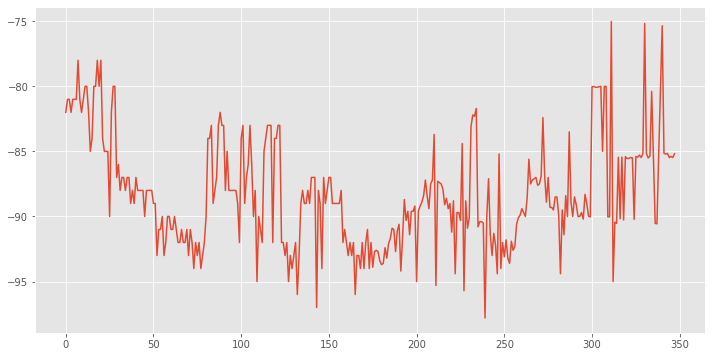

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(np.arange(0,len(dataset)),dataset)

In [ ]:
def sliding_window(data, window_size): 
  from numpy import array
  X, y = list(), list()
  for i in range(len(data)):
    # find the end of this pattern
    end_ix = i + window_size
    # check if we are beyond the sequence
    if end_ix > len(data)-1: 
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = data[i:end_ix], data[end_ix] 
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
n_steps = 25
# split into samples
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
cp = ModelCheckpoint('modelmlp1c4/', save_best_only=True)
ea = EarlyStopping(monitor='val_loss', patience=500)
X, y = sliding_window(list(dataset)[:len(dataset)-last], n_steps)
X_val, y_val = sliding_window(list(agg3_close_v1)[len(dataset)-last:], n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Dense(150, activation='relu', input_dim=n_steps)) 
model.add(Dense(1))
opt = Adam(learning_rate=.0001)
model.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
# fit model


history = model.fit(X, y, epochs=1000, validation_data=(X_val, y_val), verbose=1, callbacks=[cp, ea])


Epoch 1/1000
7/7 [==============================] - 1s 95ms/step - loss: 23517.1406 - root_mean_squared_error: 153.3530 - val_loss: 484093.5000 - val_root_mean_squared_error: 695.7683
Epoch 2/1000
7/7 [==============================] - 0s 80ms/step - loss: 19675.8594 - root_mean_squared_error: 140.2707 - val_loss: 451668.3438 - val_root_mean_squared_error: 672.0627
Epoch 3/1000
7/7 [==============================] - 1s 83ms/step - loss: 16178.7393 - root_mean_squared_error: 127.1957 - val_loss: 423056.6562 - val_root_mean_squared_error: 650.4280
Epoch 4/1000
7/7 [==============================] - 0s 80ms/step - loss: 13076.1504 - root_mean_squared_error: 114.3510 - val_loss: 398415.9062 - val_root_mean_squared_error: 631.2020
Epoch 5/1000
7/7 [==============================] - 0s 76ms/step - loss: 10385.7891 - root_mean_squared_error: 101.9107 - val_loss: 377735.4688 - val_root_mean_squared_error: 614.6019
Epoch 6/1000
7/7 [==============================] - 1s 127ms/step - loss: 8128.3

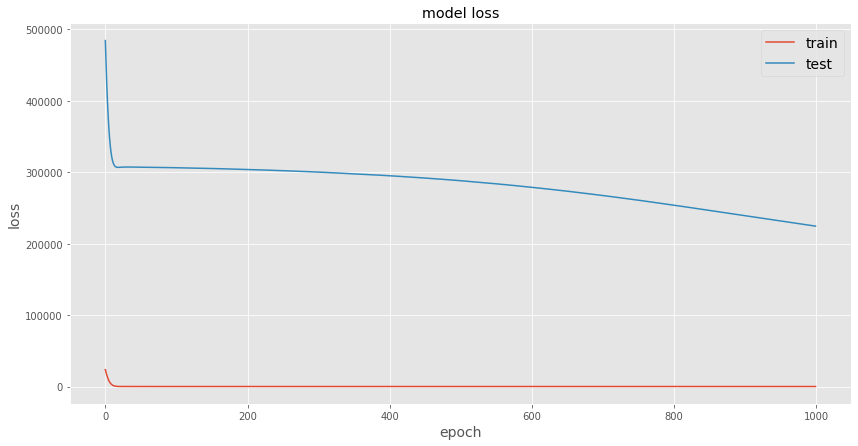

In [ ]:
plt.figure(figsize = (14,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.legend(['train', 'test'], fontsize=14)
plt.show()

In [ ]:
# demonstrate prediction for next cycles
from tensorflow.keras.models import load_model
model100 = load_model('modelmlp1c4/')

x_input = np.array(list(dataset)[-n_steps-1:])
temp_input=list(x_input)
lst_output=[]
i=0
cycles = last
while(i<cycles):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model100.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model100.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    


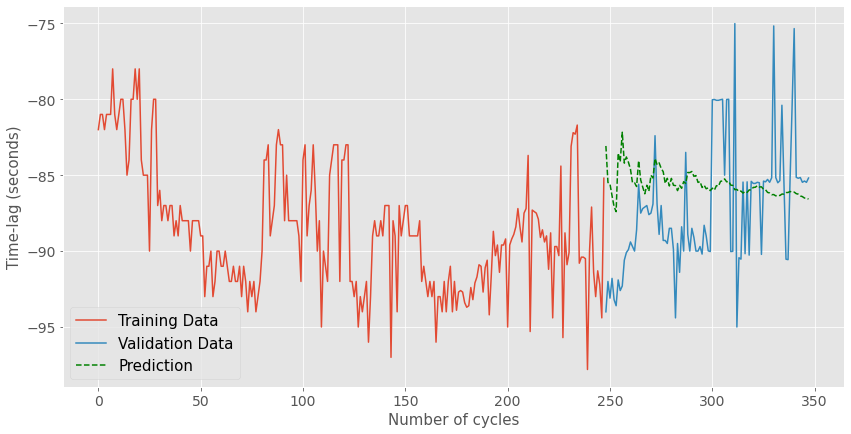

In [ ]:
new_cycle=np.arange(0,len(dataset)-last)
cycle_pred=np.arange(len(dataset)-last,len(dataset)-last+cycles)
plt.figure(figsize=(14,7))
plt.plot(new_cycle,list(dataset)[:len(dataset)-last], 
         label='Training Data')
plt.plot(np.arange(len(dataset)-last,len(dataset)), 
         list(dataset)[len(dataset)-last:], label='Validation Data')
plt.plot(cycle_pred,lst_output, c='green', label='Prediction',ls='--')

plt.xlabel('Number of cycles', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Time-lag (seconds)', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('/content/gdrive/My Drive/MASTER_data/MLP_agg1_close.png')

In [ ]:
from tensorflow.keras.metrics import mean_squared_error
print(f'RMSE {np.sqrt(mean_squared_error(list(dataset)[len(dataset)-last:], lst_output))}')

RMSE 4.696959495544434
